In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)
# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/total_gmt5.parquet')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,5,None,None,None,None,Tuesday
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,5,appliances,environment,water_heater,None,Tuesday
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,5,furniture,living_room,sofa,None,Tuesday
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,5,computers,notebook,None,None,Tuesday
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,5,electronics,smartphone,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345120463,2020-03-31 23:59:55+00:00,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24,2020-04-01,4,construction,tools,light,None,Wednesday
345120464,2020-03-31 23:59:55+00:00,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-04-01,4,appliances,personal,massager,None,Wednesday
345120465,2020-03-31 23:59:56+00:00,view,2601488,2232732101835227701,None,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1,2020-04-01,4,None,None,None,None,Wednesday
345120466,2020-03-31 23:59:56+00:00,view,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-04-01,4,appliances,personal,massager,None,Wednesday


In [ ]:
# NaN 제거 전 shape 확인 (선택)
print("Before:", df.shape)

# category_lvl1 이 NaN인 행 제거
df = df[df['category_lvl1'].notna()].copy()

# NaN 제거 후 shape 확인 (선택)
print("After:", df.shape)

Before: (345120468, 16)
After: (286704578, 16)


### 4월 데이터 제거

In [ ]:
 # df_3에서 4/1 행 제거
df = df[df['event_date'] != pd.to_datetime('2020-04-01').date()]
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,5,appliances,environment,water_heater,None,Tuesday
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,5,furniture,living_room,sofa,None,Tuesday
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,5,computers,notebook,None,None,Tuesday
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,5,electronics,smartphone,None,None,Tuesday
5,2019-10-01 00:00:05+00:00,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01,5,computers,desktop,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345000535,2020-03-31 18:59:59+00:00,view,4804056,2232732079706079299,sport.bicycle,apple,170.50,562008553,91aa6e9c-b61b-47b1-bd59-08e67d9153f6,2020-03-31,23,sport,bicycle,None,None,Tuesday
345000536,2020-03-31 18:59:59+00:00,view,5701087,2053013554415534427,electronics.video.tv,jvc,56.63,561157123,1d4320ed-aa16-4196-8129-b59bb7bce726,2020-03-31,23,electronics,video,tv,None,Tuesday
345000538,2020-03-31 18:59:59+00:00,view,100132075,2053013554658804075,electronics.audio.headphone,lenovo,566.27,616307331,774c99a4-8fdd-44a3-ae2e-e6a1b4f6a2ee,2020-03-31,23,electronics,audio,headphone,None,Tuesday
345000539,2020-03-31 18:59:59+00:00,view,100010158,2053013563835941749,appliances.kitchen.refrigerators,pulser,363.41,625382291,bcd82fde-b570-45e9-83f6-a8fc1579a40f,2020-03-31,23,appliances,kitchen,refrigerators,None,Tuesday


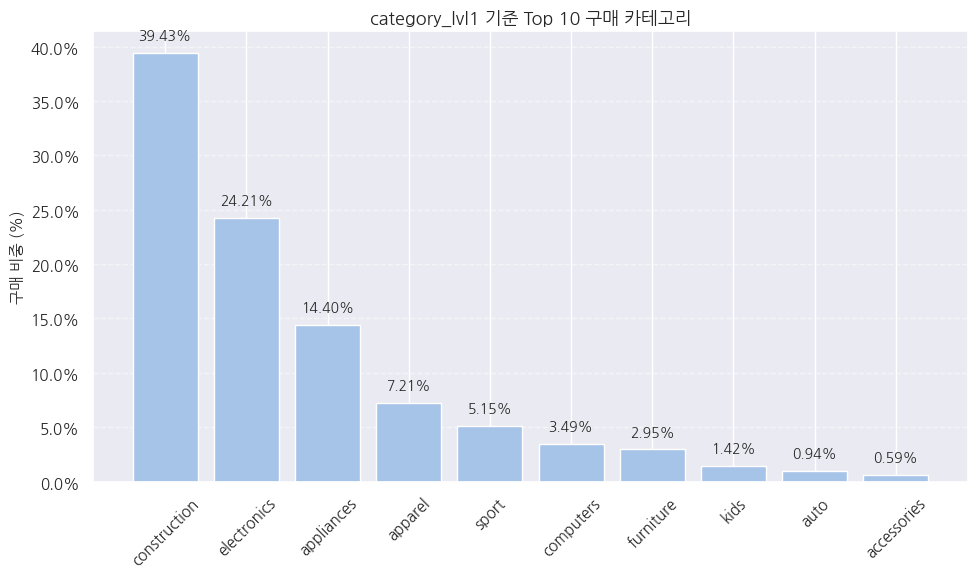

In [ ]:
import matplotlib.ticker as mtick

# 1. 구매 이벤트 필터
df_purchase = df[df['event_type'] == 'purchase'].copy()

# 2. category_lvl1이 NaN인 경우 제거 (안 되어 있으면)
df_purchase = df_purchase[df_purchase['category_lvl1'].notna()]

# 3. 카테고리별 구매 비중 계산
category_counts = df_purchase['category_lvl1'].value_counts(normalize=True).head(10)  # 상위 10개 비율

# 4. 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values, color='#a6c4e8')

# 5. 라벨 표시 (% 형식)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
             f"{height*100:.2f}%", ha='center', va='bottom', fontsize=10)

# 6. 스타일 설정
plt.title("category_lvl1 기준 Top 10 구매 카테고리", fontsize=13)
plt.ylabel("구매 비중 (%)", fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()


### 주력상품/비주력상품 나누어 저장

In [ ]:
# 1. Top3 카테고리 정의 (그래프 기준)
top3_categories = ['construction', 'electronics', 'appliances']

# 2. category_lvl1이 NaN이 아닌 데이터로 한정
df_clean = df[df['category_lvl1'].notna()].copy()

# 3. Top3 카테고리 포함 데이터
df_top3 = df_clean[df_clean['category_lvl1'].isin(top3_categories)].copy()

# 4. Top3 제외 데이터
df_others = df_clean[~df_clean['category_lvl1'].isin(top3_categories)].copy()

# 5. parquet 파일로 저장
df_top3.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/top3_categories.parquet', index=False)
df_others.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/other_categories.parquet', index=False)

In [ ]:
test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/top3_categories.parquet')

array(['view', 'purchase', 'cart'], dtype=object)

In [ ]:
test

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,5,appliances,environment,water_heater,None,Tuesday
1,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,5,electronics,smartphone,None,None,Tuesday
2,2019-10-01 00:00:11+00:00,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb,2019-10-01,5,electronics,smartphone,None,None,Tuesday
3,2019-10-01 00:00:11+00:00,view,2900536,2053013554776244595,appliances.kitchen.microwave,elenberg,51.46,555158050,b5bdd0b3-4ca2-4c55-939e-9ce44bb50abd,2019-10-01,5,appliances,kitchen,microwave,None,Tuesday
4,2019-10-01 00:00:11+00:00,view,1005011,2053013555631882655,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101,2019-10-01,5,electronics,smartphone,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188464725,2020-03-31 18:59:59+00:00,view,1004225,2232732093077520756,construction.tools.light,apple,1104.28,512572600,3a243e5a-d4a3-4cf1-afae-a671c7f37cd4,2020-03-31,23,construction,tools,light,None,Tuesday
188464726,2020-03-31 18:59:59+00:00,view,5701087,2053013554415534427,electronics.video.tv,jvc,56.63,561157123,1d4320ed-aa16-4196-8129-b59bb7bce726,2020-03-31,23,electronics,video,tv,None,Tuesday
188464727,2020-03-31 18:59:59+00:00,view,100132075,2053013554658804075,electronics.audio.headphone,lenovo,566.27,616307331,774c99a4-8fdd-44a3-ae2e-e6a1b4f6a2ee,2020-03-31,23,electronics,audio,headphone,None,Tuesday
188464728,2020-03-31 18:59:59+00:00,view,100010158,2053013563835941749,appliances.kitchen.refrigerators,pulser,363.41,625382291,bcd82fde-b570-45e9-83f6-a8fc1579a40f,2020-03-31,23,appliances,kitchen,refrigerators,None,Tuesday


In [ ]:
test2 = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/other_categories.parquet')
test2['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [3]:
test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/top3_categories.parquet')
test2 = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/other_categories.parquet')

In [4]:
# 1. 제거할 컬럼 리스트
drop_cols = ['event_time', 'category_code']

# 2. 컬럼 제거
test_cleaned = test.drop(columns=drop_cols)

# 3. parquet 파일로 저장
test_cleaned.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/top3_cleaned.parquet', index=False)

In [5]:
# 1. 제거할 컬럼 리스트
drop_cols = ['event_time', 'category_code']

# 2. 컬럼 제거
test2_cleaned = test2.drop(columns=drop_cols)

# 3. parquet 파일로 저장
test2_cleaned.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/other_cleaned.parquet', index=False)

In [6]:
tmp = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/주력_비주력상품 데이터/top3_cleaned.parquet')
tmp

,event_type,product_id,category_id,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,view,3900821,2053013552326770905,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,5,appliances,environment,water_heater,None,Tuesday
1,view,1004237,2053013555631882655,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,5,electronics,smartphone,None,None,Tuesday
2,view,1004545,2053013555631882655,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb,2019-10-01,5,electronics,smartphone,None,None,Tuesday
3,view,2900536,2053013554776244595,elenberg,51.46,555158050,b5bdd0b3-4ca2-4c55-939e-9ce44bb50abd,2019-10-01,5,appliances,kitchen,microwave,None,Tuesday
4,view,1005011,2053013555631882655,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101,2019-10-01,5,electronics,smartphone,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188464725,view,1004225,2232732093077520756,apple,1104.28,512572600,3a243e5a-d4a3-4cf1-afae-a671c7f37cd4,2020-03-31,23,construction,tools,light,None,Tuesday
188464726,view,5701087,2053013554415534427,jvc,56.63,561157123,1d4320ed-aa16-4196-8129-b59bb7bce726,2020-03-31,23,electronics,video,tv,None,Tuesday
188464727,view,100132075,2053013554658804075,lenovo,566.27,616307331,774c99a4-8fdd-44a3-ae2e-e6a1b4f6a2ee,2020-03-31,23,electronics,audio,headphone,None,Tuesday
188464728,view,100010158,2053013563835941749,pulser,363.41,625382291,bcd82fde-b570-45e9-83f6-a8fc1579a40f,2020-03-31,23,appliances,kitchen,refrigerators,None,Tuesday


In [ ]:
test2

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,5,furniture,living_room,sofa,None,Tuesday
1,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,5,computers,notebook,None,None,Tuesday
2,2019-10-01 00:00:05+00:00,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01,5,computers,desktop,None,None,Tuesday
3,2019-10-01 00:00:10+00:00,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,2019-10-01,5,apparel,shoes,keds,None,Tuesday
4,2019-10-01 00:00:16+00:00,view,13500240,2053013557099889147,furniture.bedroom.bed,brw,93.18,555446365,7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4,2019-10-01,5,furniture,bedroom,bed,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98131528,2020-03-31 18:59:58+00:00,view,100172862,2232732114124538702,apparel.shoes,rooman,71.82,626088076,77472822-64b5-4000-a1e3-b757b4244466,2020-03-31,23,apparel,shoes,None,None,Tuesday
98131529,2020-03-31 18:59:58+00:00,view,7202279,2232732084546306225,furniture.living_room.chair,None,9.52,634136524,f0d03600-507a-4f26-b4e0-67aa1fa2c6c2,2020-03-31,23,furniture,living_room,chair,None,Tuesday
98131530,2020-03-31 18:59:58+00:00,view,9200473,2232732104343421549,apparel.scarf,ritmix,7.00,630903806,267c010f-8dbd-4cd4-8816-f4ffea502d73,2020-03-31,23,apparel,scarf,None,None,Tuesday
98131531,2020-03-31 18:59:59+00:00,view,15500139,2232732108319621820,apparel.underwear,flight,73.36,517441190,ac227671-933a-43f8-b057-f70df41f2dd7,2020-03-31,23,apparel,underwear,None,None,Tuesday


# ✅ 한번만 구매한 고객의 user_id와 일치하는 view, cart 데이터셋

In [ ]:
# ① user_id별 구매 횟수 계산
purchase_count = df[df['event_type'] == 'purchase'] \
                    .groupby('user_id').size() \
                    .reset_index(name='purchase_count')

# ② 구매 1회인 유저 ID 추출
one_time_buyers = purchase_count[purchase_count['purchase_count'] == 1]['user_id']

# ③ 해당 유저들의 view/cart 이벤트 필터링
vc_df = df[(df['user_id'].isin(one_time_buyers)) &
           (df['event_type'].isin(['view', 'cart']))].copy()

# ④ 구매한 user_id 목록 확보 (전체 구매자 기준)
purchased_users = df[df['event_type'] == 'purchase']['user_id'].unique()

# ⑤ vc_df에서 user_id가 구매한 적 있는지 확인
vc_df = vc_df[vc_df['user_id'].isin(purchased_users)]

# 결과 확인
vc_df


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
43,2019-10-01 00:00:35+00:00,view,3701244,2053013565983425517,appliances.environment.vacuum,elenberg,33.44,515535834,d90a6f2f-0d0f-47cf-9fe9-62db93dffdb9,2019-10-01,5,appliances,environment,vacuum,None,Tuesday
44,2019-10-01 00:00:35+00:00,view,4300070,2053013552385491165,None,timberk,38.59,544648245,bb8e28c8-d11f-428a-95e7-056e974fe835,2019-10-01,5,None,None,None,None,Tuesday
47,2019-10-01 00:00:36+00:00,view,3600575,2053013563810775923,appliances.kitchen.washer,hotpoint-ariston,275.37,554754045,bd0302ef-c5ca-4b6a-b916-95cc2840c72c,2019-10-01,5,appliances,kitchen,washer,None,Tuesday
48,2019-10-01 00:00:36+00:00,view,2900475,2053013554776244595,appliances.kitchen.microwave,gorenje,295.99,533078094,6eaaf55a-7bbe-4b3d-95a8-f3b3e31c39c8,2019-10-01,5,appliances,kitchen,microwave,None,Tuesday
60,2019-10-01 00:00:46+00:00,view,4100126,2053013561218695907,None,sony,326.62,519885473,b70cb218-db90-4011-b582-0bd237109df1,2019-10-01,5,None,None,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345000507,2020-03-31 18:59:57+00:00,cart,7600170,2232732103982711397,furniture.kitchen.table,d-link,7.70,592982145,e719af53-7b0c-44e6-b347-f31fb3df06e8,2020-03-31,23,furniture,kitchen,table,None,Tuesday
345000508,2020-03-31 18:59:57+00:00,view,18900005,2232732109175259860,sport.trainer,canon,177.61,516115438,bf2db978-1f1d-41b3-8890-9e83aee8e9bc,2020-03-31,23,sport,trainer,None,None,Tuesday
345000524,2020-03-31 18:59:58+00:00,view,100172862,2232732114124538702,apparel.shoes,rooman,71.82,626088076,77472822-64b5-4000-a1e3-b757b4244466,2020-03-31,23,apparel,shoes,None,None,Tuesday
345000526,2020-03-31 18:59:58+00:00,view,7202279,2232732084546306225,furniture.living_room.chair,None,9.52,634136524,f0d03600-507a-4f26-b4e0-67aa1fa2c6c2,2020-03-31,23,furniture,living_room,chair,None,Tuesday


In [ ]:
one_time_user_data.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/onetime.parquet', index=False)

# ✅ 한번만 구매한 고객 추출

In [ ]:
# ① 구매 이벤트만 추출
purchase_df = df[df['event_type'] == 'purchase']

# ② user_id별 구매 횟수 집계
purchase_count = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

# ③ 구매 1회 고객만 필터링
one_time_buyers = purchase_count[purchase_count['purchase_count'] == 1]['user_id']

# ④ 전체 데이터 중 해당 고객들의 모든 이벤트 추출
one_time_user_data = df[df['user_id'].isin(one_time_buyers)].copy()

# 결과 확인
one_time_user_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
43,2019-10-01 00:00:35+00:00,view,3701244,2053013565983425517,appliances.environment.vacuum,elenberg,33.44,515535834,d90a6f2f-0d0f-47cf-9fe9-62db93dffdb9,2019-10-01,5,appliances,environment,vacuum,None,Tuesday
44,2019-10-01 00:00:35+00:00,view,4300070,2053013552385491165,None,timberk,38.59,544648245,bb8e28c8-d11f-428a-95e7-056e974fe835,2019-10-01,5,None,None,None,None,Tuesday
47,2019-10-01 00:00:36+00:00,view,3600575,2053013563810775923,appliances.kitchen.washer,hotpoint-ariston,275.37,554754045,bd0302ef-c5ca-4b6a-b916-95cc2840c72c,2019-10-01,5,appliances,kitchen,washer,None,Tuesday
48,2019-10-01 00:00:36+00:00,view,2900475,2053013554776244595,appliances.kitchen.microwave,gorenje,295.99,533078094,6eaaf55a-7bbe-4b3d-95a8-f3b3e31c39c8,2019-10-01,5,appliances,kitchen,microwave,None,Tuesday
60,2019-10-01 00:00:46+00:00,view,4100126,2053013561218695907,None,sony,326.62,519885473,b70cb218-db90-4011-b582-0bd237109df1,2019-10-01,5,None,None,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345000507,2020-03-31 18:59:57+00:00,cart,7600170,2232732103982711397,furniture.kitchen.table,d-link,7.70,592982145,e719af53-7b0c-44e6-b347-f31fb3df06e8,2020-03-31,23,furniture,kitchen,table,None,Tuesday
345000508,2020-03-31 18:59:57+00:00,view,18900005,2232732109175259860,sport.trainer,canon,177.61,516115438,bf2db978-1f1d-41b3-8890-9e83aee8e9bc,2020-03-31,23,sport,trainer,None,None,Tuesday
345000524,2020-03-31 18:59:58+00:00,view,100172862,2232732114124538702,apparel.shoes,rooman,71.82,626088076,77472822-64b5-4000-a1e3-b757b4244466,2020-03-31,23,apparel,shoes,None,None,Tuesday
345000526,2020-03-31 18:59:58+00:00,view,7202279,2232732084546306225,furniture.living_room.chair,None,9.52,634136524,f0d03600-507a-4f26-b4e0-67aa1fa2c6c2,2020-03-31,23,furniture,living_room,chair,None,Tuesday


In [ ]:
# ① 구매 이벤트만 추출
purchase_df = df[df['event_type'] == 'purchase']

# ② user_id별 구매 횟수 집계
purchase_count = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

# ③ 구매 2회 이상 고객 ID 추출
repeat_buyers = purchase_count[purchase_count['purchase_count'] >= 2]['user_id']

# ✅ ④ 전체 데이터 중 해당 고객의 view/cart/purchase 이벤트만 추출
target_events = ['view', 'cart', 'purchase']
repeat_buyers_events = df[
    (df['user_id'].isin(repeat_buyers)) &
    (df['event_type'].isin(target_events))
].copy()

# 결과 확인
repeat_buyers_events

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,weekday
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,5,None,None,None,None,Tuesday
5,2019-10-01 00:00:05+00:00,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01,5,computers,desktop,None,None,Tuesday
13,2019-10-01 00:00:15+00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,5,None,None,None,None,Tuesday
22,2019-10-01 00:00:22+00:00,view,1480714,2053013561092866779,computers.desktop,pulser,921.49,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01,5,computers,desktop,None,None,Tuesday
23,2019-10-01 00:00:23+00:00,view,1004739,2053013555631882655,electronics.smartphone,xiaomi,197.55,519530528,9882d21f-2c5f-496b-90d4-a1503edb6562,2019-10-01,5,electronics,smartphone,None,None,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345000520,2020-03-31 18:59:58+00:00,view,100109996,2232732089269092627,None,babyliss,72.05,553113344,c2e28fff-ef03-438c-bb03-05fc4822889b,2020-03-31,23,None,None,None,None,Tuesday
345000529,2020-03-31 18:59:59+00:00,purchase,1005115,2232732093077520756,construction.tools.light,apple,962.54,512482163,1b2bdbcd-a092-4269-a00c-dd71eb3fe54f,2020-03-31,23,construction,tools,light,None,Tuesday
345000532,2020-03-31 18:59:59+00:00,view,26013754,2232732081383800932,None,None,40.93,517681987,c14255fa-b148-4f69-bed1-464f2bcb1641,2020-03-31,23,None,None,None,None,Tuesday
345000533,2020-03-31 18:59:59+00:00,view,15500139,2232732108319621820,apparel.underwear,flight,73.36,517441190,ac227671-933a-43f8-b057-f70df41f2dd7,2020-03-31,23,apparel,underwear,None,None,Tuesday


In [ ]:
repeat_buyers_events.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/repeat_buyers.parquet', index=False)